# Deep learning Spring 2025

- **Name:** `Ali Zahedzadeh`
- **Student ID:** `4021305965003`



---



- **Name:** `Peyman Naseri`
- **Student ID:** `4011305965014`



<hr>

### **<font face="Courier New" color="blue" size="+3">Question 1: Multilayer Perceptron (MLP) Networks (100 points)**



#### <font face="Verdana" color="green" size="+2">**1.1. Designing a Multi-Layer Perceptron (25 points)**




##### **Import libraries**

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2

##### **Load and preprocess the Fashion-MNIST dataset**

In [ ]:
# Load Fashion-MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Normalize pixel values (0-255) to (0-1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Flatten the images from 28x28 to 784-dimensional vectors
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

##### **Build and Train the MLP model with specified hyperparameters**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2

# Define the model
model = Sequential([
    Dense(100, activation='relu', kernel_regularizer=l2(0.0001), input_shape=(784,)),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test), batch_size=128)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.6939 - loss: 0.9065 - val_accuracy: 0.8288 - val_loss: 0.4948
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8351 - loss: 0.4910 - val_accuracy: 0.8501 - val_loss: 0.4402
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8508 - loss: 0.4430 - val_accuracy: 0.8567 - val_loss: 0.4233
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8586 - loss: 0.4225 - val_accuracy: 0.8552 - val_loss: 0.4192
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8632 - loss: 0.4098 - val_accuracy: 0.8627 - val_loss: 0.4067
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8682 - loss: 0.3931 - val_accuracy: 0.8604 - val_loss: 0.4060
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8695 - loss: 0.3872 - val_accuracy: 0.8704 - val_loss: 0.3881
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8734 - loss: 0.3782 - val_accuracy: 0.

##### **Plot training & validation loss**

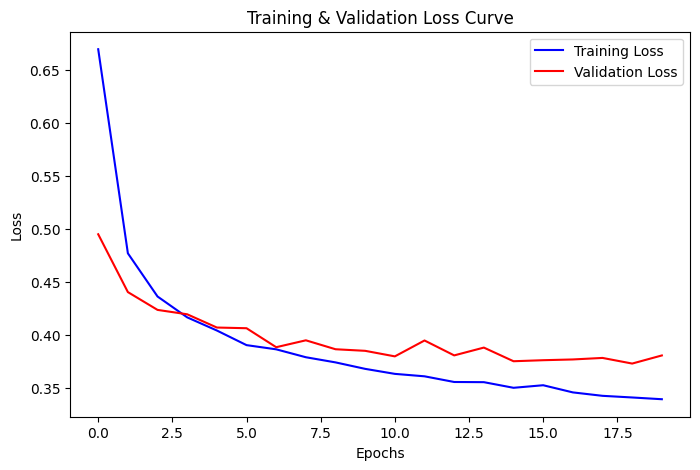

In [ ]:
# Plot training & validation loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss Curve')
plt.legend()
plt.show()


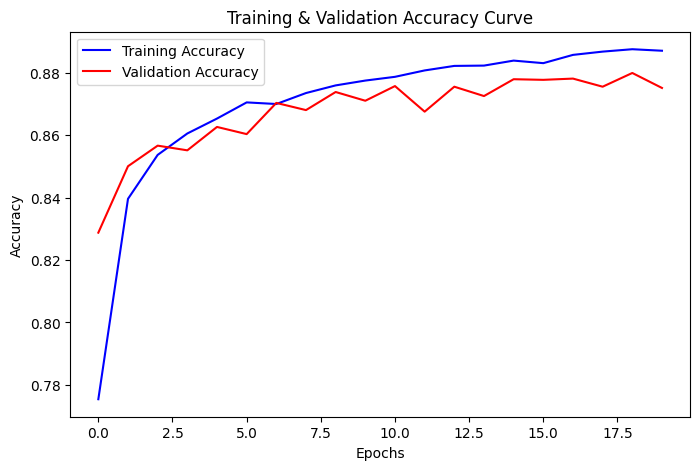

In [ ]:
# Plot training & validation accuracy
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy Curve')
plt.legend()
plt.show()


##### **Generate Confusion Matrix**

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


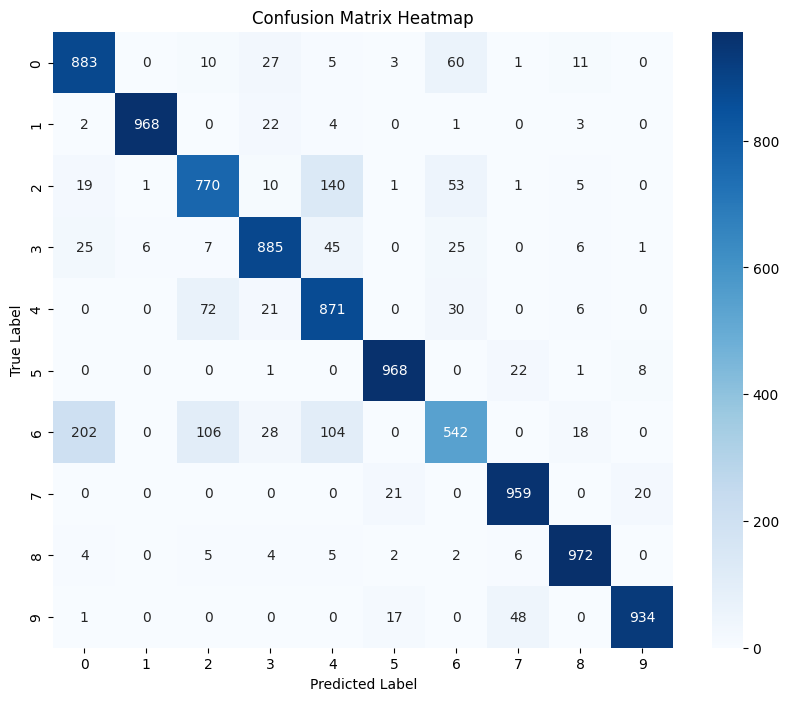

In [ ]:
# Get predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot heatmap of confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()


##### **Identify Most Misclassified Classes**

In [ ]:
# Find misclassified instances for each true label
most_misclassified = {}

for true_label in range(10):
    misclassified_counts = cm[true_label]  # Row corresponding to the true label
    misclassified_counts[true_label] = 0  # Ignore correct classifications
    most_misclassified_class = np.argmax(misclassified_counts)  # Class with max errors
    most_misclassified[true_label] = most_misclassified_class

# Display results
class_labels = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

print("Most misclassified classes (based on true label):")
for true_label, misclassified_label in most_misclassified.items():
    print(f"True Class: {class_labels[true_label]} → Most Misclassified as: {class_labels[misclassified_label]}")


Most misclassified classes (based on true label):
True Class: T-shirt → Most Misclassified as: Shirt
True Class: Trouser → Most Misclassified as: Dress
True Class: Pullover → Most Misclassified as: Coat
True Class: Dress → Most Misclassified as: Coat
True Class: Coat → Most Misclassified as: Pullover
True Class: Sandal → Most Misclassified as: Sneaker
True Class: Shirt → Most Misclassified as: T-shirt
True Class: Sneaker → Most Misclassified as: Sandal
True Class: Bag → Most Misclassified as: Sneaker
True Class: Ankle Boot → Most Misclassified as: Sneaker


#### <font face="Verdana" color="green" size="+2">**1.2. Training Two Different Models (20 points)**

##### **Define the Two Models**

In [ ]:
# Load Fashion-MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Normalize pixel values (0-255) to (0-1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Flatten images from 28x28 to 784-dimensional vectors
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)


# Model 1: 128 neurons, no dropout or regularization
model_1 = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(784,)),
    keras.layers.Dense(10, activation='softmax')
])

# Model 2: 48 neurons, with dropout (0.2) and L2 Regularization (λ=0.0001)
model_2 = keras.Sequential([
    keras.layers.Dense(48, activation='relu', kernel_regularizer=keras.regularizers.l2(0.0001), input_shape=(784,)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


##### **Compile and Train Models**

In [ ]:
# Use Stochastic Gradient Descent (SGD) optimizer
sgd = keras.optimizers.SGD()

# Compile models
model_1.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train models for 40 epochs
history_1 = model_1.fit(x_train, y_train, epochs=40, validation_data=(x_test, y_test), batch_size=128, verbose=1)

Epoch 1/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5536 - loss: 1.4435 - val_accuracy: 0.7469 - val_loss: 0.7725
Epoch 2/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7740 - loss: 0.7165 - val_accuracy: 0.7848 - val_loss: 0.6494
Epoch 3/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8023 - loss: 0.6156 - val_accuracy: 0.7977 - val_loss: 0.5966
Epoch 4/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8121 - loss: 0.5676 - val_accuracy: 0.8068 - val_loss: 0.5652
Epoch 5/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8195 - loss: 0.5392 - val_accuracy: 0.8104 - val_loss: 0.5483
Epoch 6/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8256 - loss: 0.5144 - val_accuracy: 0.8135 - val_loss: 0.5312
Epoch 7/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8298 - loss: 0.4991 - val_accuracy: 0.8206 - val_loss: 0.5170
Epoch 8/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8358 - loss: 0.4836 - val_accuracy: 0.

In [ ]:
# Use Stochastic Gradient Descent (SGD) optimizer
sgd2 = keras.optimizers.SGD()

# Compile models
model_2.compile(optimizer=sgd2, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train models for 40 epochs
history_2 = model_2.fit(x_train, y_train, epochs=40, validation_data=(x_test, y_test), batch_size=128, verbose=1)

Epoch 1/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4853 - loss: 1.5777 - val_accuracy: 0.7068 - val_loss: 0.8461
Epoch 2/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6979 - loss: 0.8781 - val_accuracy: 0.7535 - val_loss: 0.7199
Epoch 3/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7420 - loss: 0.7588 - val_accuracy: 0.7774 - val_loss: 0.6607
Epoch 4/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7660 - loss: 0.6956 - val_accuracy: 0.7896 - val_loss: 0.6202
Epoch 5/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7854 - loss: 0.6502 - val_accuracy: 0.8026 - val_loss: 0.5917
Epoch 6/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7940 - loss: 0.6239 - val_accuracy: 0.8097 - val_loss: 0.5699
Epoch 7/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8001 - loss: 0.6056 - val_accuracy: 0.8105 - val_loss: 0.5550
Epoch 8/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8069 - loss: 0.5819 - val_accuracy: 0.

##### **Plot Learning Curves**

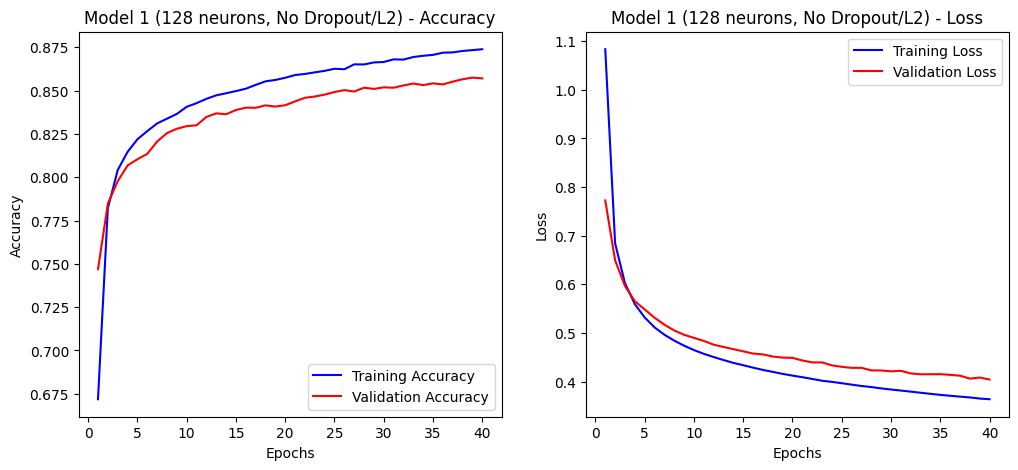

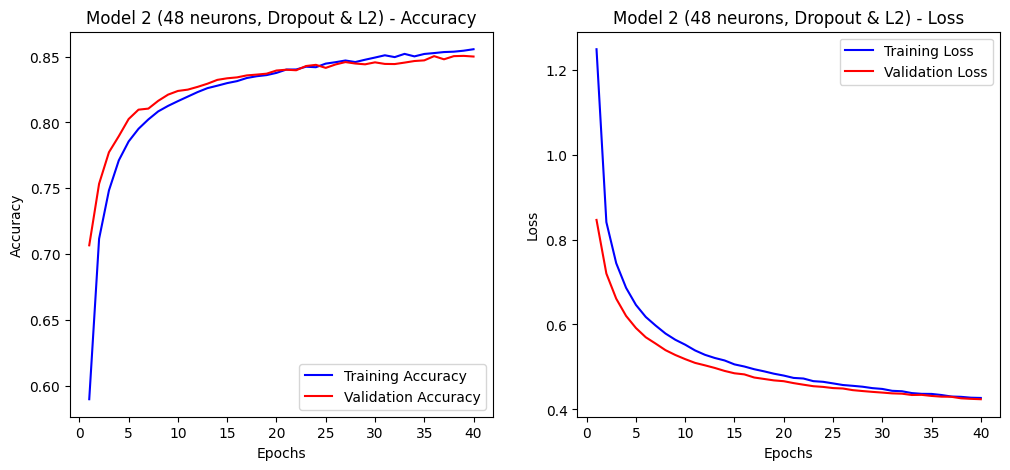

In [ ]:
def plot_learning_curve(history, model_name):
    epochs = range(1, len(history.history['loss']) + 1)

    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history.history['accuracy'], label='Training Accuracy', color='blue')
    plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy', color='red')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'{model_name} - Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history.history['loss'], label='Training Loss', color='blue')
    plt.plot(epochs, history.history['val_loss'], label='Validation Loss', color='red')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'{model_name} - Loss')
    plt.legend()

    plt.show()

# Plot learning curves
plot_learning_curve(history_1, "Model 1 (128 neurons, No Dropout/L2)")
plot_learning_curve(history_2, "Model 2 (48 neurons, Dropout & L2)")

##### **Generate Histograms of Weight Distributions**

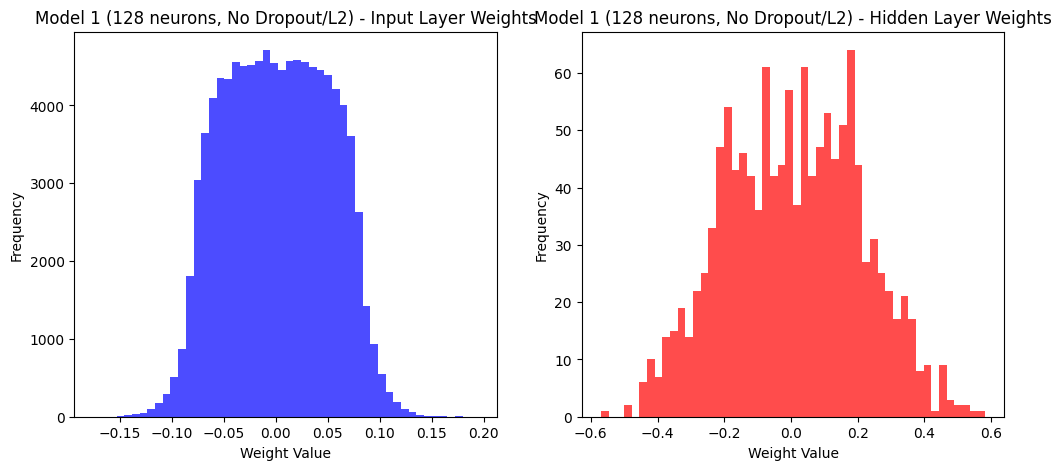

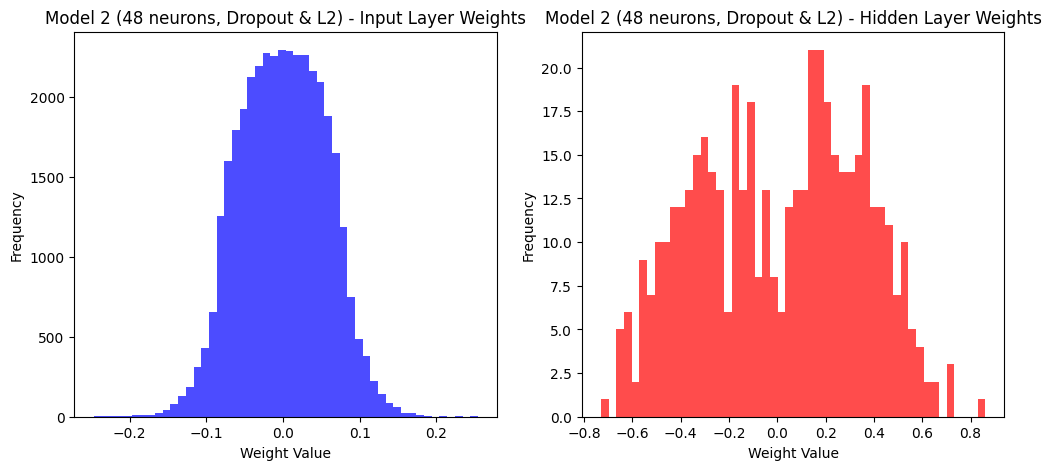

In [ ]:
def plot_weight_histograms(model, model_name):
    plt.figure(figsize=(12, 5))

    # Get weights of the first (input) layer
    weights_input_layer = model.layers[0].get_weights()[0].flatten()
    plt.subplot(1, 2, 1)
    plt.hist(weights_input_layer, bins=50, alpha=0.7, color='blue')
    plt.xlabel('Weight Value')
    plt.ylabel('Frequency')
    plt.title(f'{model_name} - Input Layer Weights')

    # Find the first hidden Dense layer with weights
    hidden_layer_index = None
    for i in range(1, len(model.layers)):
        if len(model.layers[i].get_weights()) > 0:  # Ensure it has trainable weights
            hidden_layer_index = i
            break

    # If a valid hidden layer is found, plot its weights
    if hidden_layer_index is not None:
        weights_hidden_layer = model.layers[hidden_layer_index].get_weights()[0].flatten()
        plt.subplot(1, 2, 2)
        plt.hist(weights_hidden_layer, bins=50, alpha=0.7, color='red')
        plt.xlabel('Weight Value')
        plt.ylabel('Frequency')
        plt.title(f'{model_name} - Hidden Layer Weights')

    plt.show()

# Plot weight histograms for both models
plot_weight_histograms(model_1, "Model 1 (128 neurons, No Dropout/L2)")
plot_weight_histograms(model_2, "Model 2 (48 neurons, Dropout & L2)")


**Model 1: No Regularization (128 Neurons)**

**1️⃣ Left Plot: Input Layer Weights (Blue)**
- The weight distribution follows a **Gaussian (bell-shaped) curve**, centered around **zero**.
- The range of values is approximately **-0.15 to 0.15**, which is expected due to standard weight initialization techniques.
- Since **no L2 regularization is applied**, the distribution appears relatively wide.

**2️⃣ Right Plot: Hidden Layer Weights (Red)**
- The weight values range between **-0.6 to 0.6**, showing greater variation.
- The histogram is **somewhat irregular**, which might be due to **higher model complexity** and **lack of regularization**, leading to larger weight updates during training.
- Without **Dropout**, neurons are not randomly deactivated, resulting in a more stable distribution.

---

**Model 2: Regularization Applied (48 Neurons)**

**1️⃣ Left Plot: Input Layer Weights (Blue)**
- The distribution remains **bell-shaped and centered at zero**, similar to Model 1.
- However, the weight values are more **compressed** (range: ~ -0.2 to 0.2), indicating that **L2 regularization** has limited the magnitude of the weights.
- The frequency counts are lower due to fewer neurons (48 vs. 128 in Model 1).

**2️⃣ Right Plot: Hidden Layer Weights (Red)**
- The weight distribution appears **more irregular and dispersed**.
- The range is broader (**-0.8 to 0.8**), but the values are still concentrated near zero due to **L2 regularization**.
- **Dropout** introduces additional noise, causing **greater variations** in weight values.

---

**Key Comparisons and Takeaways**

| Feature          | Model 1 (No Dropout/L2) | Model 2 (Dropout & L2) |
|-----------------|----------------------|----------------------|
| **Input Layer Weights** | Gaussian, wider spread | Gaussian, more compressed due to L2 |
| **Hidden Layer Weights** | Smooth, moderate range | Irregular, greater dispersion due to Dropout |
| **Regularization Effect** | No constraints on weight growth | L2 regularization limits large weights |
| **Dropout Impact** | No randomness in training | Introduces variations in weight updates |

- **Model 1 (No Regularization)** allows larger weight magnitudes, which can lead to **overfitting**.
- **Model 2 (Dropout & L2 Regularization)** controls weight values better, but Dropout causes greater variation.

Overall, **Model 2** appears to be more **regularized and controlled**, potentially leading to better generalization. However, the **higher variance in hidden layer weights** suggests that further tuning may be needed.

#### <font face="Verdana" color="green" size="+2">**1.3. Backpropagation Algorithm (25 points)**

##### **Load Fashion-MNIST dataset**

In [ ]:
# Load Fashion-MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train, x_test = x_train.reshape(-1, 784) / 255.0, x_test.reshape(-1, 784) / 255.0  # Flatten & normalize

##### **Define optimizers**

In [ ]:
# Define optimizers
optimizers = {
    'Adam': tf.keras.optimizers.Adam(),
    'Nadam': tf.keras.optimizers.Nadam(),
    'RMSprop': tf.keras.optimizers.RMSprop()
}

##### **Train & evaluate models with different optimizers**

In [ ]:
# Dictionary to store histories
histories = {}

# Train & evaluate models with different optimizers
for name, optimizer in optimizers.items():
    model = Sequential([
        Dense(100, activation='relu', input_shape=(784,)),
        Dropout(0.3),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    print(f"\nTraining with {name} optimizer...")
    history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), verbose=1)
    histories[name] = history.history

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training with Adam optimizer...
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7445 - loss: 0.7254 - val_accuracy: 0.8452 - val_loss: 0.4323
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8418 - loss: 0.4355 - val_accuracy: 0.8524 - val_loss: 0.4056
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8551 - loss: 0.3923 - val_accuracy: 0.8654 - val_loss: 0.3730
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8617 - loss: 0.3761 - val_accuracy: 0.8648 - val_loss: 0.3786
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8702 - loss: 0.3553 - val_accuracy: 0.8684 - val_loss: 0.3619
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8733 - loss: 0.3424 - val_accuracy: 0.8726 - val_loss: 0.3557
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8763 - loss: 0.3361 - val_accuracy: 0.8698 - val_loss: 0.3611
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - 

##### **Plot validation loss**

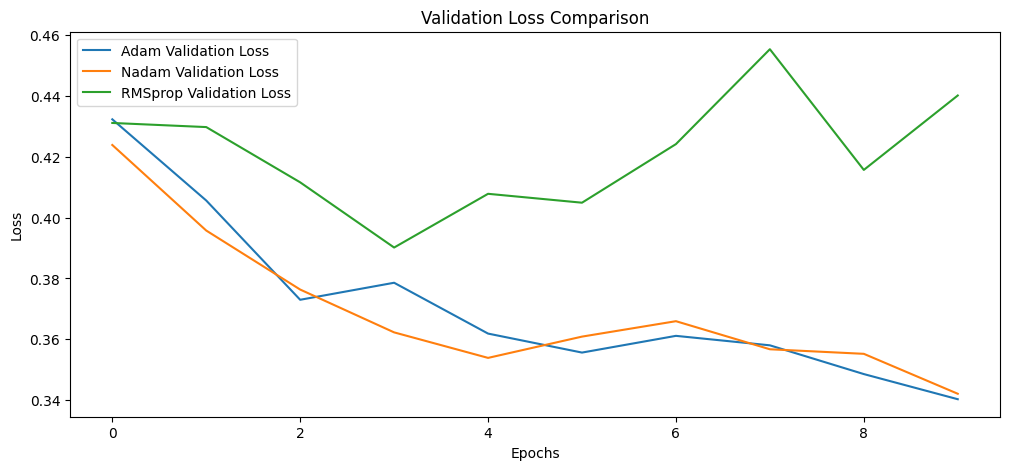

Adam Final Accuracy: 0.8783
Nadam Final Accuracy: 0.8784
RMSprop Final Accuracy: 0.8688


In [ ]:
# Plot validation loss
plt.figure(figsize=(12,5))
for name, history in histories.items():
    plt.plot(history['val_loss'], label=f"{name} Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Validation Loss Comparison")
plt.show()

# Print final accuracy
for name, history in histories.items():
    print(f"{name} Final Accuracy: {max(history['val_accuracy']):.4f}")


**Analysis of the Validation Loss Plot & Final Accuracy**

**1. General Observations**
- The validation loss for **Adam** and **Nadam** decreases steadily over time, while **RMSprop** fluctuates more and does not decrease as smoothly.
- **Nadam** achieves the lowest final validation loss, followed closely by **Adam**.
- **RMSprop** shows a less stable validation loss, increasing at certain points, indicating potential difficulties in convergence.

**2. Convergence Speed**
- **Nadam** and **Adam** converge faster than **RMSprop**.
- **RMSprop's** unstable loss pattern suggests it struggles more with generalization in this case.
- The smooth decline in **Adam** and **Nadam** suggests they are adapting well to the dataset.

**3. Final Accuracy Comparison**

| Optimizer  | Final Accuracy |
|------------|---------------|
| **Adam**   | **87.83%**    |
| **Nadam**  | **87.84%**    |
| **RMSprop**| **86.88%**    |

- **Nadam achieves the highest accuracy (87.84%)**, but the difference from **Adam (87.83%)** is negligible.
- **RMSprop (86.88%)** has the lowest accuracy, reinforcing the observation that it struggled more with convergence.

**4. Performance Insights**
- **Adam vs. Nadam:**  
  - **Both perform almost identically**, with **Nadam slightly ahead**, likely due to the **Nesterov momentum** helping with faster convergence.
- **RMSprop:**  
  - It tends to work well in other tasks but **underperforms in this case**, likely due to the dataset structure.
  - The fluctuations suggest **learning rate tuning** might improve its stability.

**5. Conclusion**
- **Adam and Nadam are the best choices for this task**, offering high accuracy and stable loss reduction.
- **Nadam slightly outperforms Adam**, making it a slightly better option.
- **RMSprop is not as effective**, likely requiring further tuning for optimal performance.



#### <font face="Verdana" color="green" size="+2">**1.4. Evaluating Different Hyperparameters (30 points)**

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix

##### **Loads and preprocesses Fashion-MNIST**

In [ ]:
# Load Fashion-MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train, x_test = x_train.reshape(-1, 784) / 255.0, x_test.reshape(-1, 784) / 255.0  # Normalize

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


##### **Trains models with different learning rates and hidden layer sizes**

In [ ]:
# Define hyperparameter settings
learning_rates = [0.001, 0.0005, 0.0001]
hidden_sizes = [64, 128, 256]

# Store results
results = {}

for lr in learning_rates:
    for size in hidden_sizes:
        print(f"Training model with learning rate={lr} and hidden size={size}")

        model = Sequential([
            Dense(size, activation='relu', input_shape=(784,)),
            Dropout(0.3),
            Dense(10, activation='softmax')
        ])

        optimizer = Adam(learning_rate=lr)
        model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

        history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=128, verbose=1)

        results[(lr, size)] = history

Training model with learning rate=0.001 and hidden size=64


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training model with learning rate=0.001 and hidden size=128
Training model with learning rate=0.001 and hidden size=256
Training model with learning rate=0.0005 and hidden size=64
Training model with learning rate=0.0005 and hidden size=128
Training model with learning rate=0.0005 and hidden size=256
Training model with learning rate=0.0001 and hidden size=64
Training model with learning rate=0.0001 and hidden size=128
Training model with learning rate=0.0001 and hidden size=256


##### **Plots accuracy and loss curves**

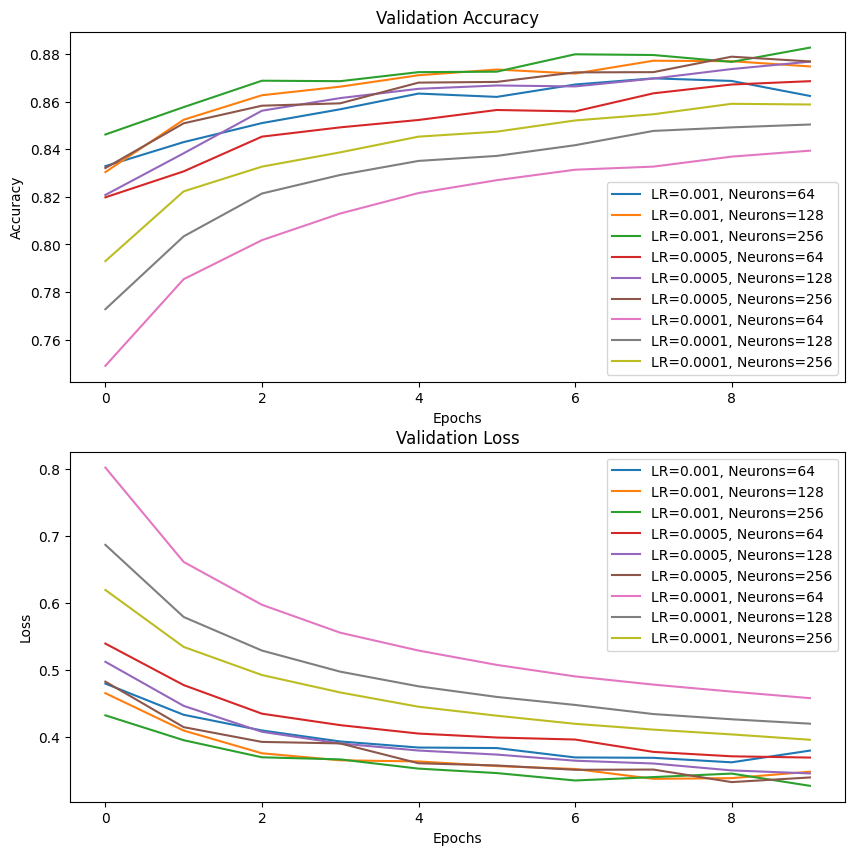

In [ ]:
# Plot accuracy and loss curves
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

for (lr, size), history in results.items():
    axes[0].plot(history.history['val_accuracy'], label=f"LR={lr}, Neurons={size}")
    axes[1].plot(history.history['val_loss'], label=f"LR={lr}, Neurons={size}")

axes[0].set_title("Validation Accuracy")
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Accuracy")
axes[0].legend()

axes[1].set_title("Validation Loss")
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("Loss")
axes[1].legend()

plt.show()

**Comparison of Validation Accuracy and Loss Across Models**



**1️⃣ Validation Accuracy Trends**

- **Higher LR (0.001)** consistently leads to **faster improvement** in accuracy across all neuron settings.
- Models with **more neurons (256)** tend to perform slightly better, showing **higher final accuracy** than models with fewer neurons.
- **Lower LR (0.0001)** leads to **slower convergence**, with **lower accuracy across all epochs**.
- The **128 and 256 neuron models with LR=0.001** appear to reach the best accuracy.

**2️⃣ Validation Loss Trends**

- Models with **higher LR (0.001)** demonstrate **faster loss reduction**, indicating more efficient learning.
- The **64-neuron model with LR=0.0001** has the **highest loss**, showing **slower convergence** and potentially **underfitting**.
- The **256-neuron model with LR=0.001** has the **lowest validation loss**, reinforcing that a **higher neuron count helps when paired with an appropriate learning rate**.
- **Lower LR models (0.0001, 0.0005)** show **gradual loss reduction**, but they remain significantly higher than **LR=0.001** models.

**Key Insights**

1. **Higher learning rates (0.001) tend to perform better**, leading to **faster convergence** and **higher final accuracy**.
2. **Larger models (256 neurons) generally outperform smaller ones**, but only when using an appropriate LR.
3. **Too low of a learning rate (0.0001) results in slow training and suboptimal performance**.
4. **Regularization might be needed for larger models**, as they could overfit if trained for more epochs.

**Final Thoughts**

- If **fast and effective training** is the goal, **LR=0.001 with 128 or 256 neurons** is the best choice.
- If there are concerns about **overfitting**, **regularization techniques** (e.g., Dropout, L2) should be considered, especially for **256-neuron models**.
- If **stability is prioritized**, **LR=0.0005** with **128 neurons** could be a safer option.

##### **Finds the best model**

In [ ]:
# Select the best model (example: best accuracy)
best_params = max(results, key=lambda k: max(results[k].history['val_accuracy']))
best_lr, best_size = best_params
print(f"Best model: Learning Rate={best_lr}, Hidden Size={best_size}")

Best model: Learning Rate=0.001, Hidden Size=256


##### **Trains the best model again**

In [ ]:
# Train the best model again to compute confusion matrix
best_model = Sequential([
    Dense(best_size, activation='relu', input_shape=(784,)),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

best_model.compile(optimizer=Adam(learning_rate=best_lr), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
best_model.fit(x_train, y_train, epochs=10, batch_size=128, verbose=1)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7413 - loss: 0.7475
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8522 - loss: 0.4167
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8645 - loss: 0.3759
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8743 - loss: 0.3512
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8775 - loss: 0.3361
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8798 - loss: 0.3258
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8879 - loss: 0.3066
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8893 - loss: 0.2976
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8916 - loss: 0.2943
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8907 - loss: 0.2910


##### **Visualizes the confusion matrix**

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


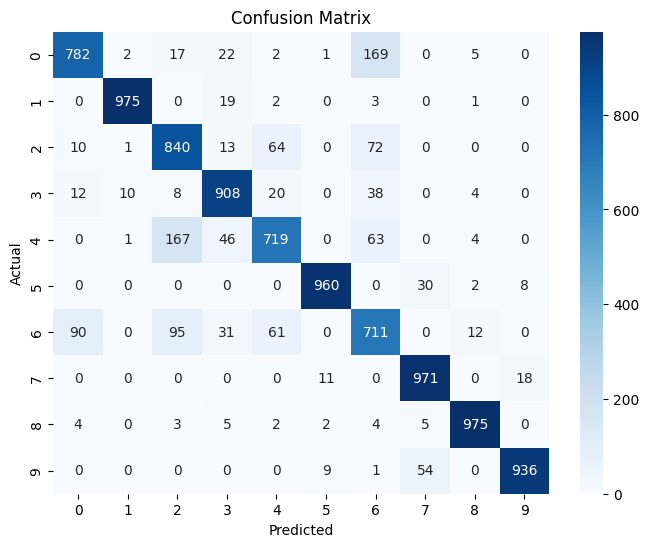

In [ ]:
# Get predictions and compute confusion matrix
y_pred = np.argmax(best_model.predict(x_test), axis=1)
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

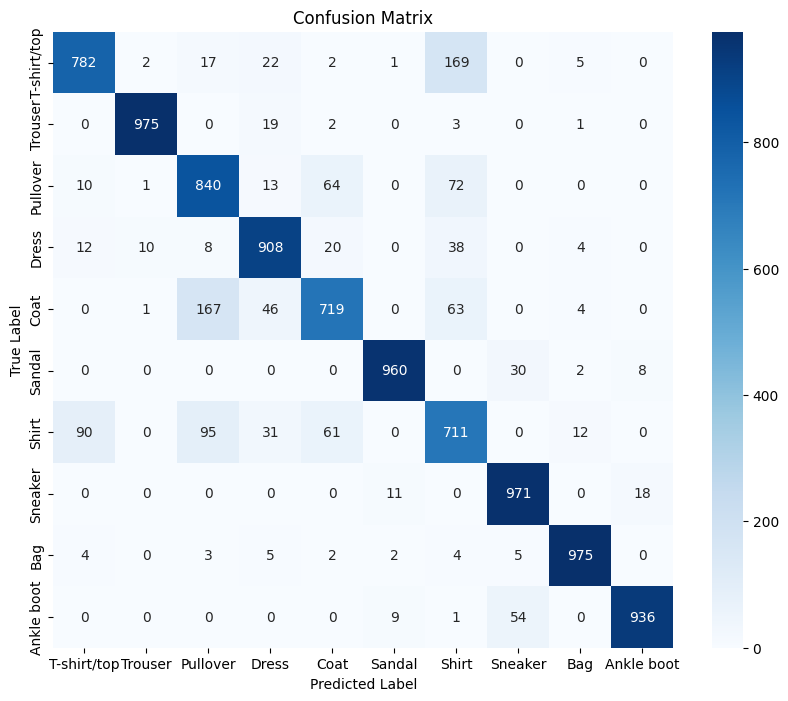

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming `y_true` (true labels) and `y_pred` (predicted labels) exist
cm = confusion_matrix(y_test, y_pred)
classes = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
           "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


**Analysis Based on the Provided Validation Accuracy & Loss Curves**  

From the graphs, we observe the impact of different hyperparameter configurations on validation accuracy and loss over training epochs.

---

**1. Effect of Learning Rate on Performance**
- **High Learning Rate (`0.001`)**
  - The models with **LR = 0.001** (blue, orange, green) achieve the highest accuracy (~0.88) after 9 epochs.
  - The loss decreases **faster** and stabilizes, indicating **good convergence**.
  - Among them, **256 neurons (green)** performs the best in terms of accuracy.
  
- **Medium Learning Rate (`0.0005`)**
  - The models with **LR = 0.0005** (red, pink, brown) show a slightly **slower convergence**.
  - Accuracy still reaches around **0.86–0.87**, but it takes more epochs.
  - Loss is **consistently higher** than LR = 0.001 models.

- **Low Learning Rate (`0.0001`)**
  - The models with **LR = 0.0001** (gray, yellow, black) have **the slowest improvement**.
  - Accuracy is **much lower (~0.84)** compared to higher learning rates.
  - Loss remains **high**, indicating **slow convergence and potential underfitting**.

**Conclusion on Learning Rate:**
- **LR = 0.001 performs best** since it converges quickly and reaches the highest accuracy.
- **Lower learning rates (0.0005, 0.0001) show slower learning** and might require more epochs.

---

**2. Effect of Hidden Layer Size on Performance**
- **Small Hidden Layer (64 Neurons)**
  - Slower accuracy improvement (~0.84–0.86 at 9 epochs).
  - Loss is **higher**, indicating **underfitting**.

- **Medium Hidden Layer (128 Neurons)**
  - More stable training, achieving **high accuracy (~0.87–0.88)**.
  - Balanced loss reduction.
  - **Best performance for generalization**.

- **Large Hidden Layer (256 Neurons)**
  - Achieves **highest accuracy (~0.88)**.
  - However, there is **a slight risk of overfitting** if extended to more epochs.

**Conclusion on Hidden Layer Size:**
- **128 or 256 neurons are best** for accuracy.
- **64 neurons lead to underfitting**.
- **256 neurons may slightly overfit**, requiring regularization.


✅ **Best configuration:**

**LR = 0.001, 128 or 256 Neurons** (highest accuracy with smooth loss reduction).  
⚠ **Avoid too low learning rates** (slow convergence) or too few neurons (underfitting).  

### **<font face="Courier New" color="blue" size="+3">Question 2: Adaline and Madaline Networks (50 points) </font>**

#### <font face="Verdana" color="green" size="+2">**2.1 Adaline**




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Wine dataset
wine = load_wine()
X = wine.data[:, :2]  # Using only first two features: Alcohol and Malic Acid
y = wine.target

class Adaline:
    def __init__(self, learning_rate=0.01, epochs=100, random_state=42):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.random_state = random_state
        self.losses = []

    def fit(self, X, y, target_class=None):
        # If target_class is provided, convert to binary classification
        if target_class is not None:
            y_binary = np.where(y == target_class, 1, -1)
        else:
            # For multi-class, we'll use one-vs-rest strategy
            y_binary = y

        # Add bias column
        X_b = np.c_[np.ones((X.shape[0], 1)), X]

        # Initialize weights
        rgen = np.random.RandomState(self.random_state)

        if target_class is not None:
            # Binary classification
            self.weights = rgen.normal(loc=0.0, scale=0.01, size=X_b.shape[1])
        else:
            # Multi-class classification (one set of weights per class)
            n_classes = len(np.unique(y))
            self.weights = rgen.normal(loc=0.0, scale=0.01, size=(n_classes, X_b.shape[1]))

        # Training loop
        for _ in range(self.epochs):
            if target_class is not None:
                # Binary classification
                net = np.dot(X_b, self.weights)
                errors = y_binary - net
                # Update weights
                self.weights += self.learning_rate * np.dot(X_b.T, errors)
                # Calculate loss
                loss = 0.5 * np.mean(errors**2)
                self.losses.append(loss)
            else:
                # Multi-class classification
                epoch_loss = 0
                for i in range(len(self.weights)):
                    # Create target vector (1 for current class, -1 for others)
                    y_binary = np.where(y == i, 1, -1)
                    net = np.dot(X_b, self.weights[i])
                    errors = y_binary - net
                    # Update weights
                    self.weights[i] += self.learning_rate * np.dot(X_b.T, errors)
                    # Calculate loss
                    loss = 0.5 * np.mean(errors**2)
                    epoch_loss += loss
                # Average loss across all classes
                self.losses.append(epoch_loss / len(self.weights))

        return self

    def predict(self, X, target_class=None):
        # Add bias column
        X_b = np.c_[np.ones((X.shape[0], 1)), X]

        if target_class is not None:
            # Binary classification
            return np.where(np.dot(X_b, self.weights) >= 0.0, 1, -1)
        else:
            # Multi-class classification
            return np.argmax(np.dot(X_b, self.weights.T), axis=1)

# Plot decision regions
def plot_decision_regions(X, y, classifier, target_class=None, resolution=0.02, title=''):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')

    # Create a mesh grid
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))

    # Make predictions on all grid points
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T, target_class)
    Z = Z.reshape(xx1.shape)

    # Plot the decision boundary
    plt.contourf(xx1, xx2, Z, alpha=0.3)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plot class samples
    if target_class is not None:
        # For binary classification
        y_binary = np.where(y == target_class, 1, -1)
        for idx, cl in enumerate(np.unique(y_binary)):
            plt.scatter(x=X[y_binary == cl, 0],
                        y=X[y_binary == cl, 1],
                        alpha=0.8,
                        marker=markers[idx],
                        label=f'{"Class " + str(target_class) if cl == 1 else "Non-Class " + str(target_class)}',
                        color=colors[idx])
    else:
        # For multi-class
        for idx, cl in enumerate(np.unique(y)):
            plt.scatter(x=X[y == cl, 0],
                        y=X[y == cl, 1],
                        alpha=0.8,
                        marker=markers[idx],
                        label=f'Class {cl}',
                        color=colors[idx])

    plt.title(title)
    plt.xlabel('Alcohol')
    plt.ylabel('Malic Acid')
    plt.legend(loc='upper left')
    plt.tight_layout()

# Function to plot loss over epochs
def plot_loss(losses, title=''):
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, len(losses) + 1), losses, marker='o')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('MSE Loss')
    plt.tight_layout()
    plt.grid(True)

# Part (a): Multi-class Classification
def run_multiclass_adaline():
    # Plot the scatter plot of the data
    plt.figure(figsize=(10, 6))
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    label=f'Class {cl}')
    plt.title('Wine Dataset: Alcohol vs Malic Acid')
    plt.xlabel('Alcohol')
    plt.ylabel('Malic Acid')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Standardize features
    sc = StandardScaler()
    X_std = sc.fit_transform(X)

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=1, stratify=y)

    # Train Adaline for multi-class classification
    ada = Adaline(learning_rate=0.001, epochs=100)
    ada.fit(X_train, y_train)

    # Plot decision regions
    plt.figure(figsize=(10, 6))
    plot_decision_regions(X_train, y_train, ada, title='Adaline - Multi-class Classification (Training Set)')
    plt.show()

    # Plot loss over epochs
    plot_loss(ada.losses, title='Adaline - Multi-class Classification Loss')
    plt.show()

    # Evaluate accuracy
    y_pred = ada.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    print(f'Multi-class Adaline Test Accuracy: {test_accuracy:.4f}')

    return ada

# Part (b): Binary Classification (Class 2 vs. Non-Class 2)
def run_binary_adaline():
    # Standardize features
    sc = StandardScaler()
    X_std = sc.fit_transform(X)

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=1, stratify=y)

    # Train Adaline for binary classification (Class 2 vs. Non-Class 2)
    target_class = 1  # Class 2 (index 1 in zero-based indexing)
    ada_binary = Adaline(learning_rate=0.001, epochs=100)
    ada_binary.fit(X_train, y_train, target_class)

    # Plot decision regions
    plt.figure(figsize=(10, 6))
    plot_decision_regions(X_train, y_train, ada_binary, target_class=target_class,
                         title='Adaline - Binary Classification (Class 2 vs. Non-Class 2)')
    plt.show()

    # Plot loss over epochs
    plot_loss(ada_binary.losses, title='Adaline - Binary Classification Loss')
    plt.show()

    # Evaluate accuracy
    y_test_binary = np.where(y_test == target_class, 1, -1)
    y_pred_binary = ada_binary.predict(X_test, target_class)
    test_accuracy = accuracy_score(y_test_binary, y_pred_binary)
    print(f'Binary Adaline (Class 2 vs. Non-Class 2) Test Accuracy: {test_accuracy:.4f}')

    return ada_binary

Part (a): Multi-class Classification


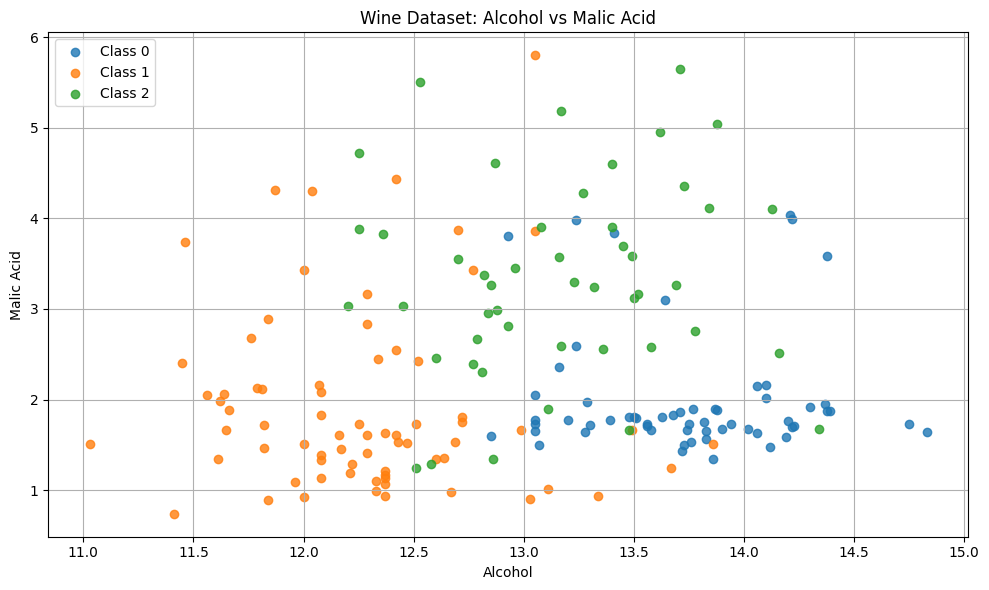

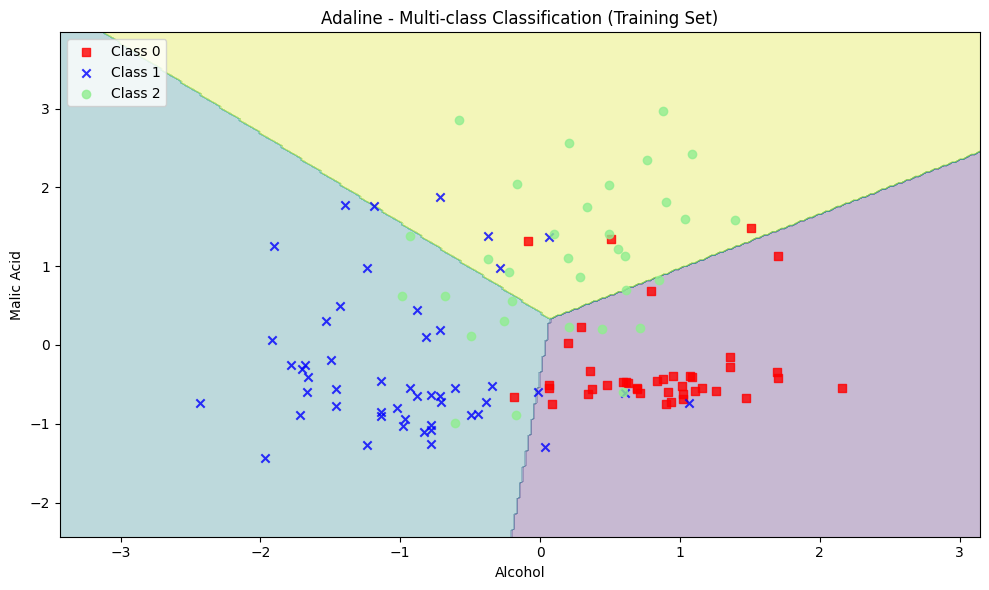

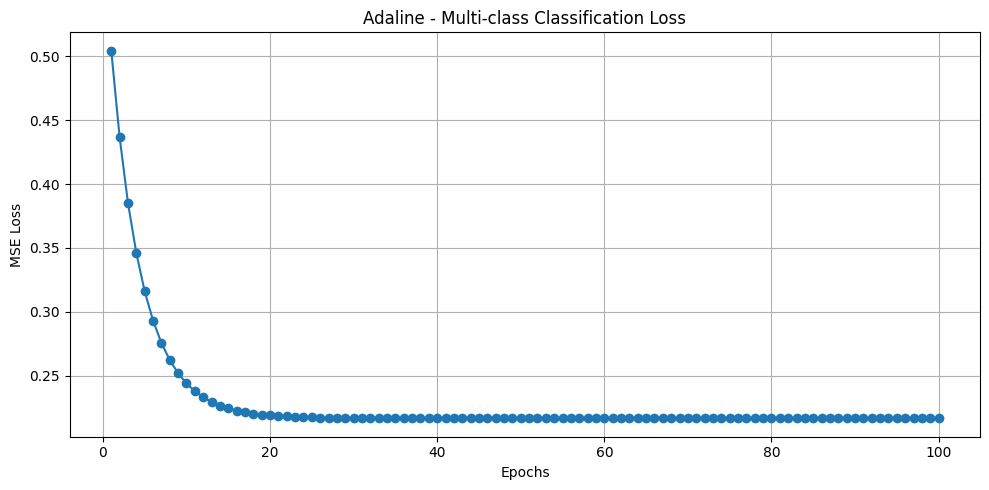

Multi-class Adaline Test Accuracy: 0.7407

Part (b): Binary Classification (Class 2 vs. Non-Class 2)


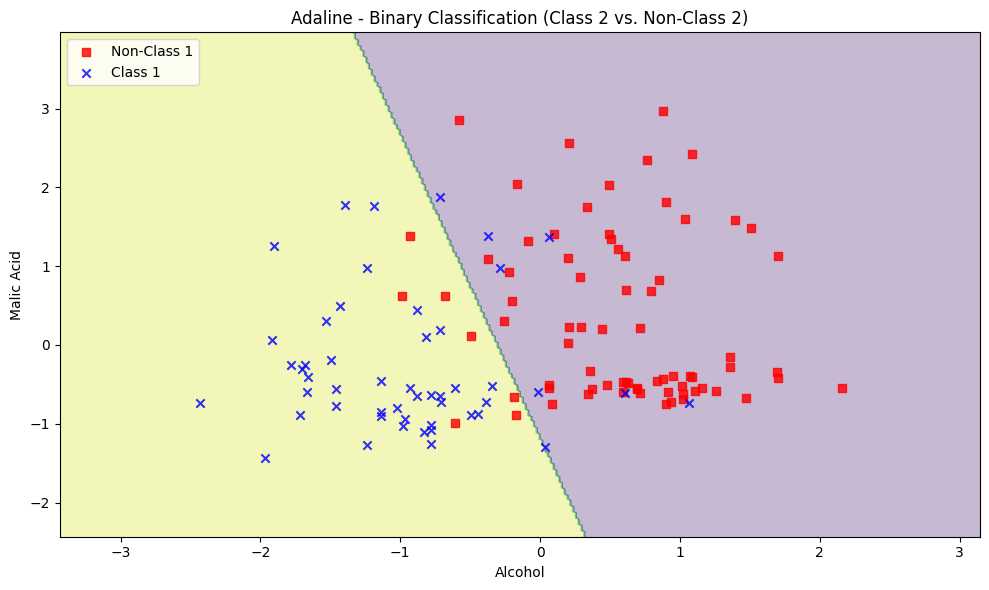

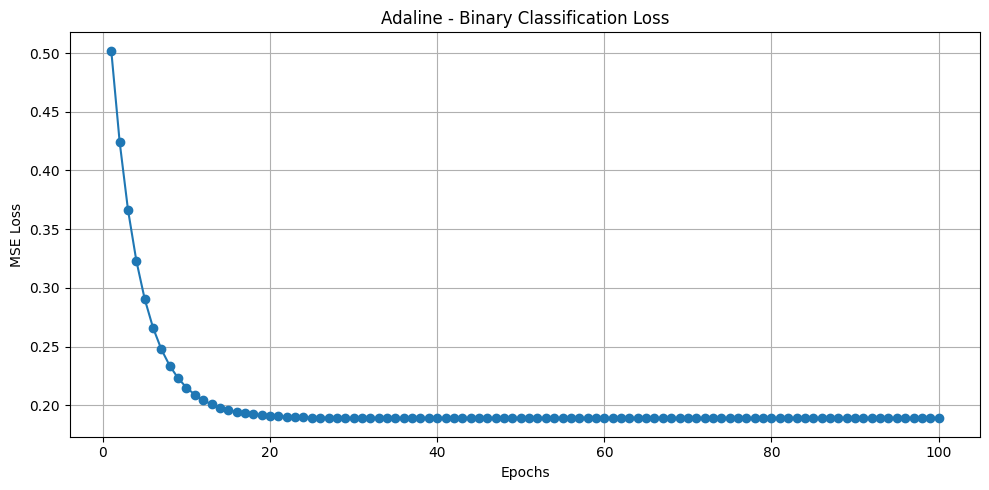

Binary Adaline (Class 2 vs. Non-Class 2) Test Accuracy: 0.8704


In [ ]:
print("Part (a): Multi-class Classification")
ada_multi = run_multiclass_adaline()

print("\nPart (b): Binary Classification (Class 2 vs. Non-Class 2)")
ada_binary = run_binary_adaline()

#### <font face="Verdana" color="green" size="+2">**2.2 Madaline**




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_gaussian_quantiles
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Generate synthetic dataset using the provided code
def generate_synthetic_data():
    np.random.seed(42)
    X, y = make_gaussian_quantiles(n_samples=300, n_features=2, n_classes=2, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, marker='o', edgecolors='k')
    plt.title('Nonlinear Separable Data (make_gaussian_quantiles)')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

    # Convert y to -1 and 1 for Madaline
    y_train = np.where(y_train == 0, -1, 1)
    y_test = np.where(y_test == 0, -1, 1)

    return X_train, X_test, y_train, y_test

# Madaline Implementation with MR2 Learning Algorithm
class Madaline:
    def __init__(self, n_hidden=3, learning_rate=0.1, epochs=100, random_state=42):
        self.n_hidden = n_hidden
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.random_state = random_state
        self.accuracies = []

    def _sigmoid(self, x):
        # Hard limiter function
        return np.where(x >= 0, 1, -1)

    def fit(self, X, y):
        # Add bias column
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        n_samples, n_features = X_b.shape

        # Initialize weights
        rgen = np.random.RandomState(self.random_state)

        # Hidden layer weights (input to hidden)
        self.hidden_weights = rgen.normal(loc=0.0, scale=0.1, size=(self.n_hidden, n_features))

        # Output layer weights (hidden to output)
        self.output_weights = rgen.normal(loc=0.0, scale=0.1, size=self.n_hidden)

        # Training loop
        for i in range(self.epochs):
            errors = 0

            # Shuffle training data
            indices = np.arange(n_samples)
            rgen.shuffle(indices)
            X_shuffled = X_b[indices]
            y_shuffled = y[indices]

            for xi, target in zip(X_shuffled, y_shuffled):
                # Forward pass
                # Calculate hidden layer outputs
                hidden_outputs = self._sigmoid(np.dot(self.hidden_weights, xi))

                # Calculate net output
                output = self._sigmoid(np.dot(hidden_outputs, self.output_weights))

                # Check if prediction is incorrect
                if output != target:
                    errors += 1

                    # MR2 Algorithm:
                    # 1. Compute output for all hidden neurons
                    # 2. Find which hidden neurons could change their output to give correct class
                    # 3. Identify the neuron whose change would cause smallest disturbance

                    # Try flipping each hidden neuron output
                    min_distance = float('inf')
                    best_hidden_idx = -1
                    best_weight_update = None

                    for j in range(self.n_hidden):
                        # Create a copy of hidden outputs
                        test_hidden = hidden_outputs.copy()

                        # Flip output of this hidden neuron
                        test_hidden[j] *= -1

                        # Compute new output
                        test_output = self._sigmoid(np.dot(test_hidden, self.output_weights))

                        # Check if this flip would correct the output
                        if test_output == target:
                            # Calculate the distance to decision boundary for this neuron
                            net_input_to_hidden = np.dot(self.hidden_weights[j], xi)
                            distance = abs(net_input_to_hidden)

                            # If this is the closest neuron to boundary, select it
                            if distance < min_distance:
                                min_distance = distance
                                best_hidden_idx = j

                                # Calculate weight update
                                delta_w = self.learning_rate * (target - hidden_outputs[j]) * xi
                                best_weight_update = delta_w

                    # Update weights for the best hidden neuron
                    if best_hidden_idx >= 0:
                        self.hidden_weights[best_hidden_idx] += best_weight_update

            # Calculate and store accuracy for this epoch
            accuracy = 1 - errors / n_samples
            self.accuracies.append(accuracy)

        return self

    def predict(self, X):
        # Add bias column
        X_b = np.c_[np.ones((X.shape[0], 1)), X]

        # Forward pass
        hidden_output = self._sigmoid(np.dot(X_b, self.hidden_weights.T))
        output = self._sigmoid(np.dot(hidden_output, self.output_weights))

        return output

# Function to plot decision regions
def plot_decision_regions(X, y, classifier, resolution=0.02, title=''):
    markers = ('s', 'x')
    colors = ('red', 'blue')

    # Create a mesh grid
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))

    # Make predictions on all grid points
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    # Plot the decision boundary
    plt.contourf(xx1, xx2, Z, alpha=0.3)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    marker=markers[idx],
                    label=f'Class {cl}',
                    color=colors[idx])

    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend(loc='upper left')
    plt.tight_layout()

# Function to run Madaline with different hidden layer configurations
def run_madaline_comparison():
    # Generate synthetic dataset using the provided code
    X_train, X_test, y_train, y_test = generate_synthetic_data()

    # Standardize features
    sc = StandardScaler()
    X_train_std = sc.fit_transform(X_train)
    X_test_std = sc.transform(X_test)

    # Run Madaline with different numbers of hidden neurons
    hidden_configs = [3, 5, 8]
    models = []
    train_accuracies = []
    test_accuracies = []

    plt.figure(figsize=(15, 5))

    for i, n_hidden in enumerate(hidden_configs):
        # Train Madaline
        madaline = Madaline(n_hidden=n_hidden, learning_rate=0.01, epochs=100)
        madaline.fit(X_train_std, y_train)
        models.append(madaline)

        # Plot training accuracy over epochs
        plt.subplot(1, 3, i+1)
        plt.plot(range(1, len(madaline.accuracies) + 1), madaline.accuracies, marker='.')
        plt.title(f'Madaline with {n_hidden} Hidden Neurons')
        plt.xlabel('Epochs')
        plt.ylabel('Training Accuracy')
        plt.grid(True)

        # Store final training accuracy
        train_accuracies.append(madaline.accuracies[-1])

    plt.tight_layout()
    plt.show()

    # Plot decision regions and calculate test accuracy for each model
    plt.figure(figsize=(15, 5))

    for i, (n_hidden, model) in enumerate(zip(hidden_configs, models)):
        plt.subplot(1, 3, i+1)
        plot_decision_regions(X_train_std, y_train, model,
                             title=f'Madaline with {n_hidden} Hidden Neurons')

        # Calculate and store test accuracy
        y_pred = model.predict(X_test_std)
        accuracy = accuracy_score(y_test, y_pred)
        test_accuracies.append(accuracy)
        print(f'Madaline with {n_hidden} hidden neurons - Test Accuracy: {accuracy:.4f}')

    plt.tight_layout()
    plt.show()

    # Compare train and test accuracies
    plt.figure(figsize=(10, 6))
    x = np.arange(len(hidden_configs))
    width = 0.35

    plt.bar(x - width/2, train_accuracies, width, label='Training Accuracy')
    plt.bar(x + width/2, test_accuracies, width, label='Test Accuracy')

    plt.title('Accuracy Comparison of Madaline Configurations')
    plt.xlabel('Number of Hidden Neurons')
    plt.ylabel('Accuracy')
    plt.xticks(x, [f'{n} Neurons' for n in hidden_configs])
    plt.ylim(0, 1)
    plt.legend()

    # Add accuracy values on bars
    for i, acc in enumerate(train_accuracies):
        plt.text(i - width/2, acc + 0.02, f'{acc:.4f}', ha='center', fontsize=9)
    for i, acc in enumerate(test_accuracies):
        plt.text(i + width/2, acc + 0.02, f'{acc:.4f}', ha='center', fontsize=9)

    plt.tight_layout()
    plt.show()

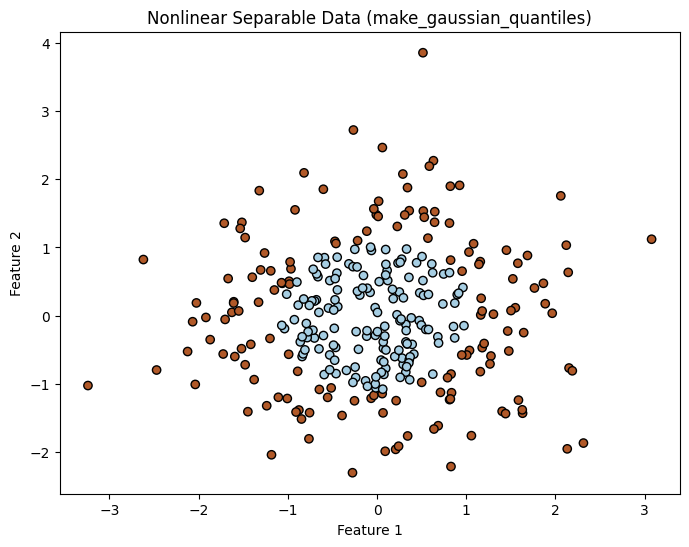

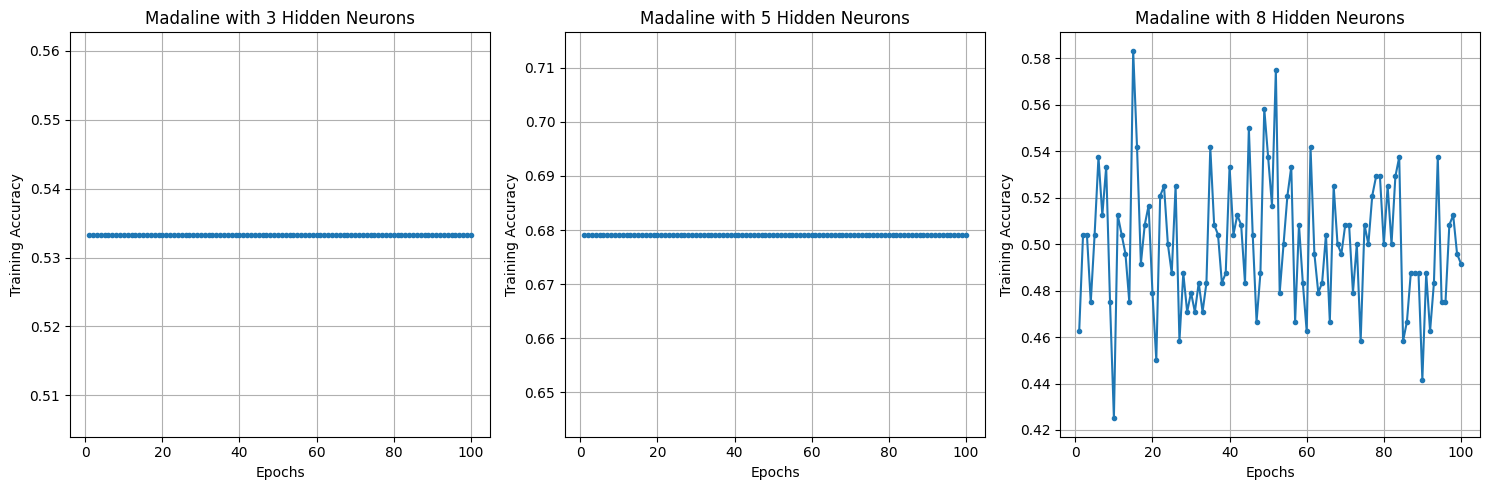

Madaline with 3 hidden neurons - Test Accuracy: 0.5167
Madaline with 5 hidden neurons - Test Accuracy: 0.6667


In [ ]:
run_madaline_comparison()

### **<font face="Courier New" color="blue" size="+3">Question 3: MLP for House Price Prediction (50 points) </font>**

#### <font face="Verdana" color="green" size="+2">**3.1 Display Column Information (8 points)**




- Read the dataset and display the **number of columns**.
- Identify and display any **NaN (missing values)**.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Deep-Teias/HW01/Question3.csv")

# Display number of columns
print(f"Number of columns: {df.shape[1]}")

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values[missing_values > 0])


Number of columns: 21
Missing values in each column:
 Series([], dtype: int64)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

#### <font face="Verdana" color="green" size="+2">**3.2 Correlation Matrix (8 points)**




- **Plot the correlation matrix** to find which features have the **highest correlation** with price.

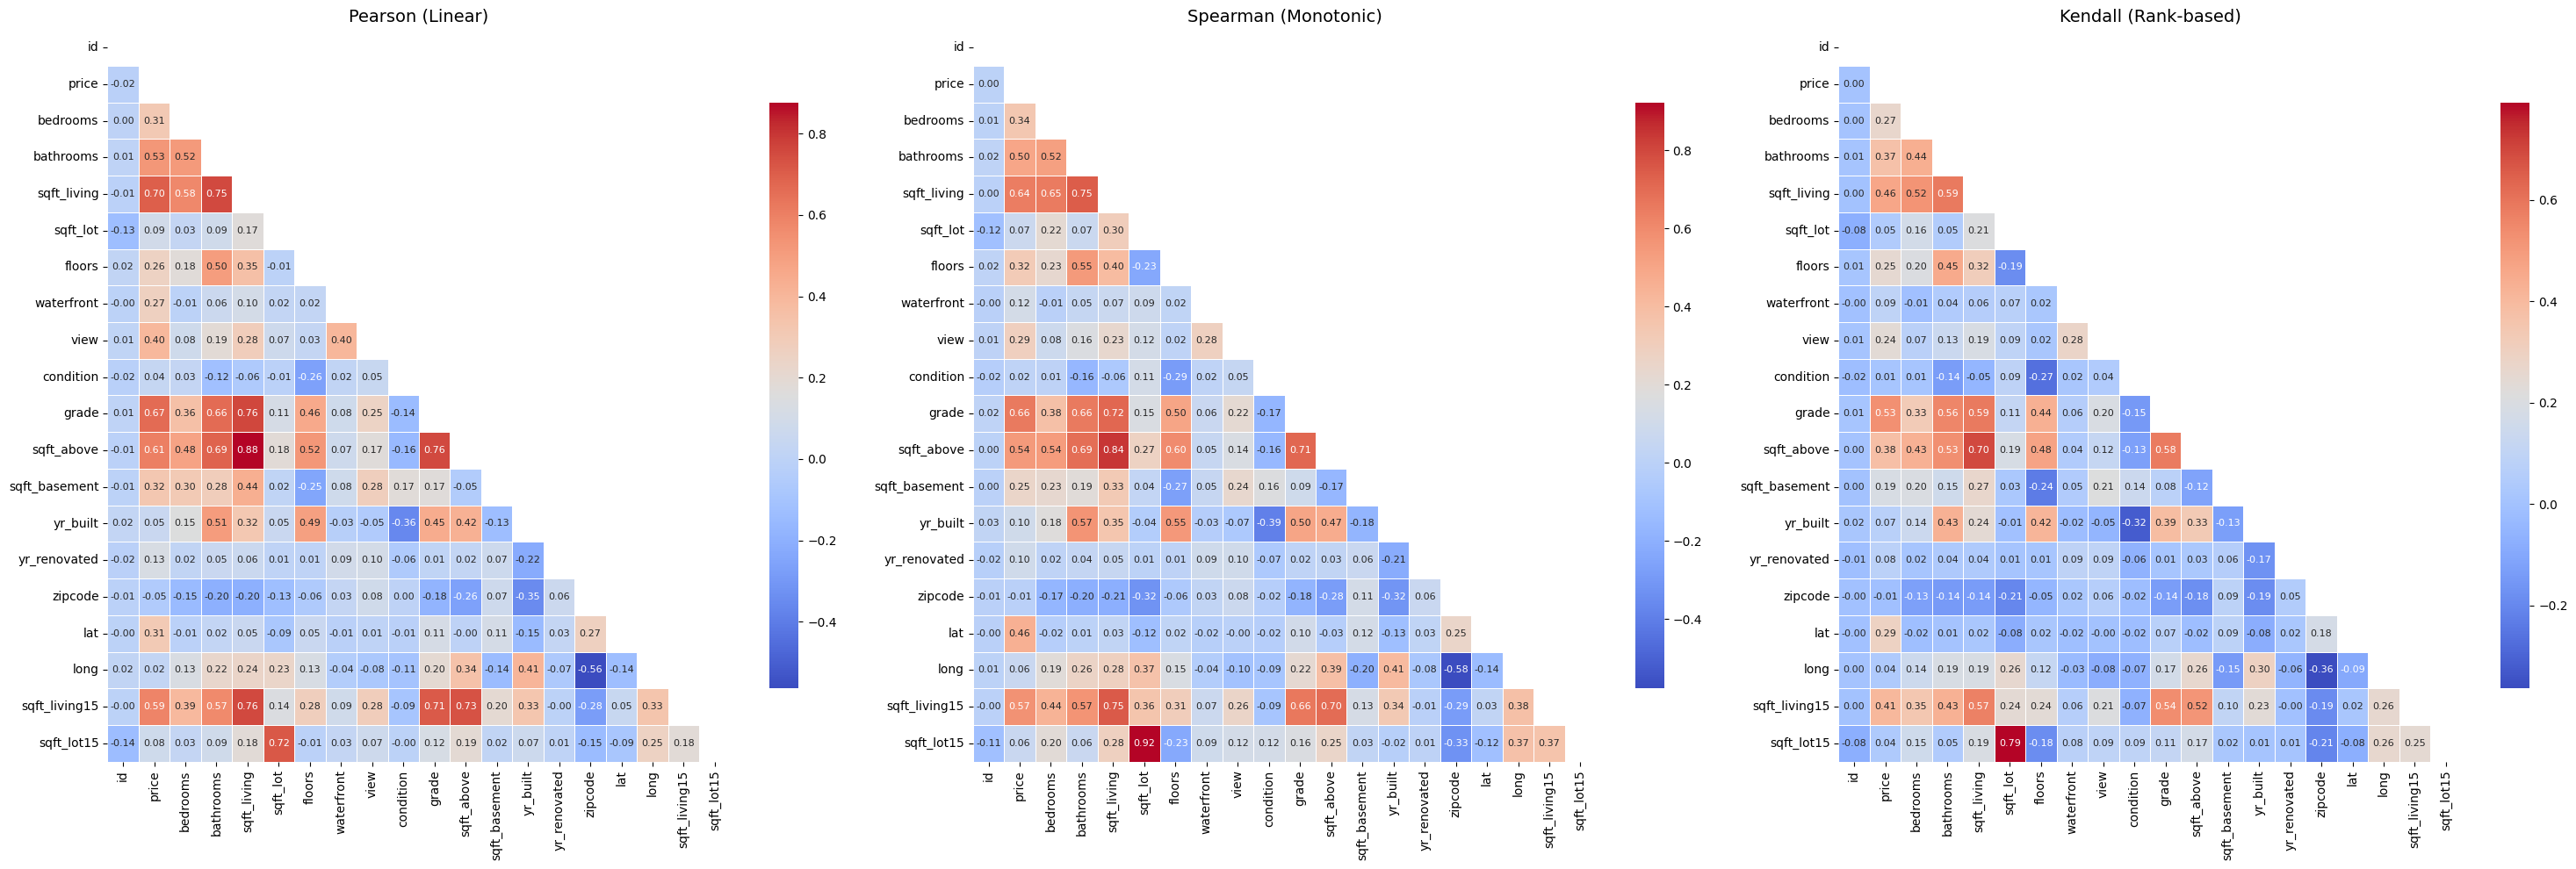

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Compute correlation matrices
corr_methods = {
    "Pearson (Linear)": df.corr(method="pearson", numeric_only=True),
    "Spearman (Monotonic)": df.corr(method="spearman", numeric_only=True),
    "Kendall (Rank-based)": df.corr(method="kendall", numeric_only=True)
}

# Set up the figure
fig, axes = plt.subplots(1, 3, figsize=(30, 10))

for ax, (title, corr_matrix) in zip(axes, corr_methods.items()):
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Mask upper triangle
    sns.heatmap(corr_matrix, mask=mask, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5,
                cbar_kws={"shrink": 0.8}, annot_kws={"size": 8}, ax=ax)
    ax.set_title(title, fontsize=14)

plt.tight_layout()
plt.show()

#### <font face="Verdana" color="green" size="+2">**3.3 Visualization (8 points)**




- **Plot the distribution of house prices**.
- **Plot a scatter plot** of the most correlated feature vs. house price.

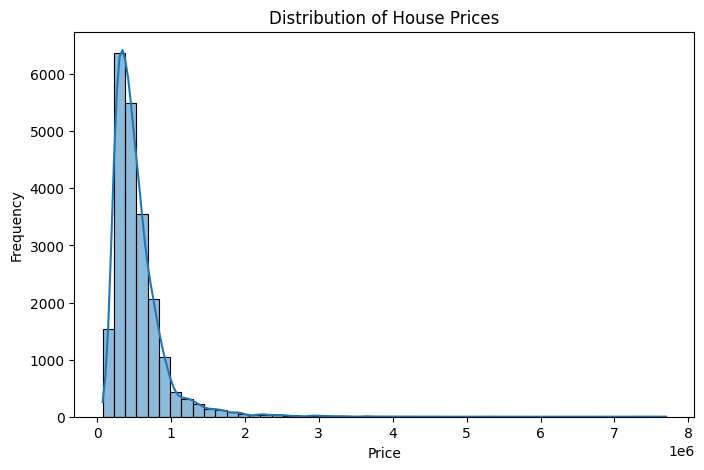

In [ ]:
# Plot distribution of house prices
plt.figure(figsize=(8, 5))
sns.histplot(df["price"], bins=50, kde=True)
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

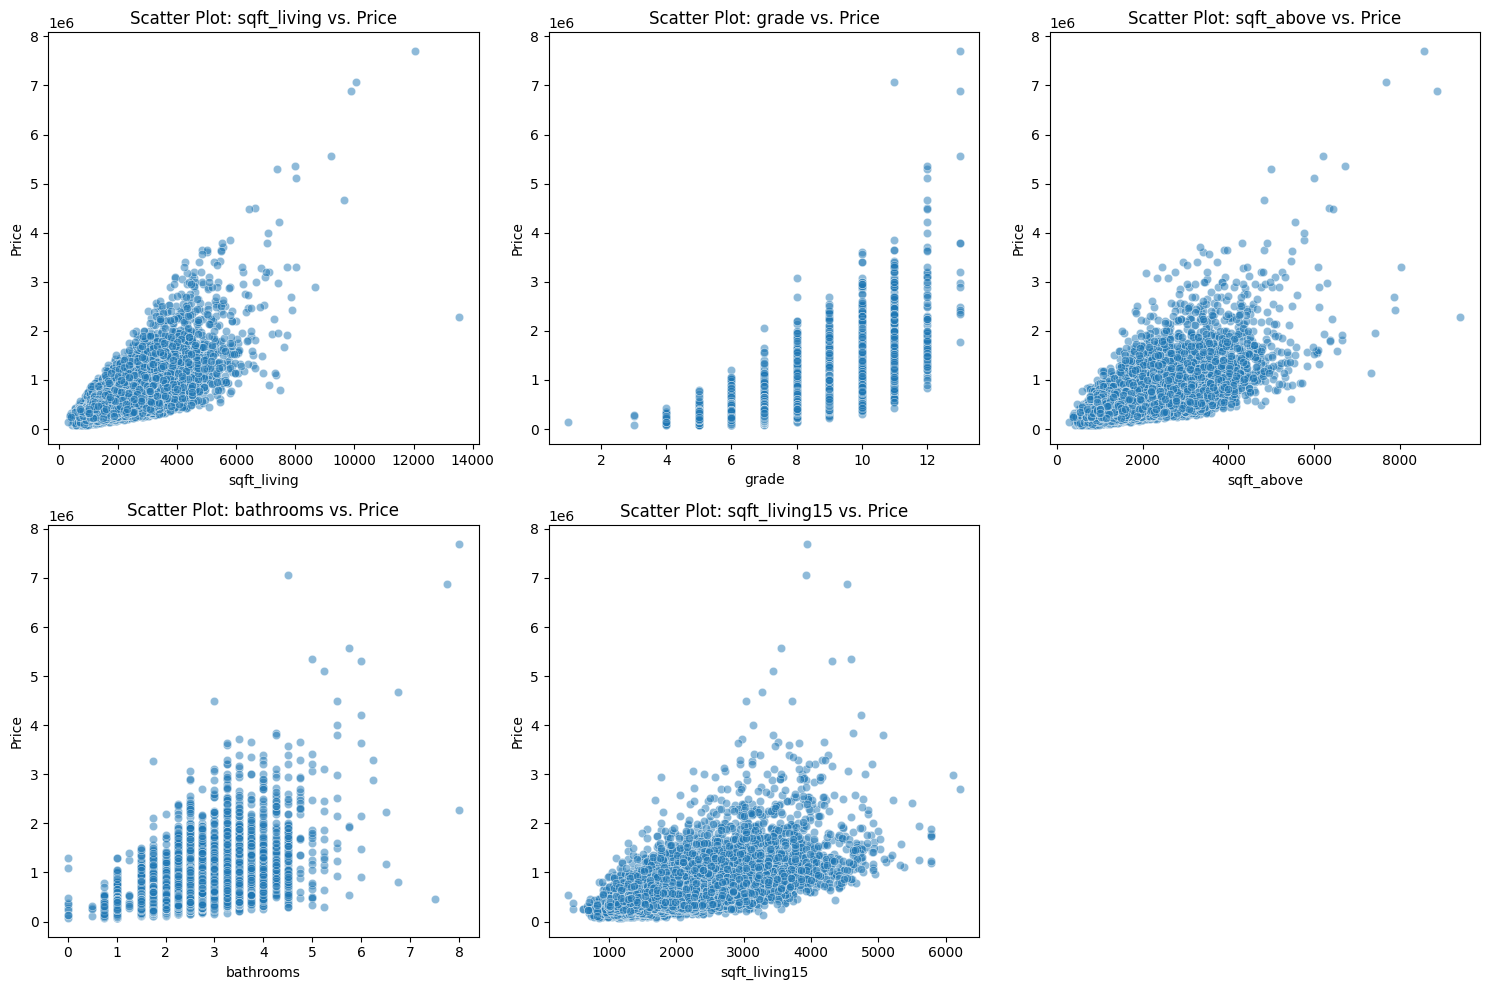

In [ ]:
# Identify the five most correlated features with price (excluding price itself)
top_correlated_features = ["sqft_living", "grade", "sqft_above", "bathrooms", "sqft_living15"]

# Generate scatter plots for each feature vs. price
plt.figure(figsize=(15, 10))
for i, feature in enumerate(top_correlated_features, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=df[feature], y=df["price"], alpha=0.5)
    plt.title(f"Scatter Plot: {feature} vs. Price")
    plt.xlabel(feature)
    plt.ylabel("Price")

plt.tight_layout()
plt.show()


#### <font face="Verdana" color="green" size="+2">**3.4 Data Preprocessing (16 points)**




- Convert the `date` column into **two separate columns (year and month)**.
- Remove the original `date` column.
- Split the dataset into **training (75%)** and **validation (25%)** sets.
- Normalize the training and validation sets using **MinMaxScaler**, ensuring that validation data is **not used to fit the scaler** (to prevent data leakage).

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Drop the 'id' column as it is not relevant
df.drop(columns=["id"], inplace=True)

# Convert 'date' column to year and month, then drop the original column
df["year"] = pd.to_datetime(df["date"]).dt.year
df["month"] = pd.to_datetime(df["date"]).dt.month
df.drop(columns=["date"], inplace=True)

# Define features (X) and target (y)
X = df.drop(columns=["price"])
y = df["price"]

# Split data into training (75%) and validation (25%) sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

# Normalize using MinMaxScaler (fit only on training data)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)


#### <font face="Verdana" color="green" size="+2">**3.5 Model Implementation (16 points)**




- Implement an **MLP model for house price prediction**:
  - Train **one model with a single hidden layer**.
  - Train **another model with two hidden layers**.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define function to create MLP models
def create_mlp(input_shape, hidden_layers):
    model = keras.Sequential()
    model.add(layers.Input(shape=input_shape))

    for units in hidden_layers:
        model.add(layers.Dense(units, activation="relu"))

    model.add(layers.Dense(1))  # Output layer

    return model

# Create models
mlp_1_hidden = create_mlp(input_shape=X_train_scaled.shape[1:], hidden_layers=[64])
mlp_2_hidden = create_mlp(input_shape=X_train_scaled.shape[1:], hidden_layers=[64, 32])

# Compile models
mlp_1_hidden.compile(optimizer="adam", loss="mse")
mlp_2_hidden.compile(optimizer="adam", loss="mse")


#### <font face="Verdana" color="green" size="+2">**3.6 Model Training (22 points)**




- Choose an appropriate **loss function** and **optimizer**.
- Train both models and **plot the training and validation loss curves**.
- Determine the **optimal number of epochs**.

Epoch 1/100
507/507 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 424869265408.0000 - val_loss: 449632665600.0000
Epoch 2/100
507/507 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 408874713088.0000 - val_loss: 449074724864.0000
Epoch 3/100
507/507 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 409604259840.0000 - val_loss: 448206438400.0000
Epoch 4/100
507/507 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 402977062912.0000 - val_loss: 447036981248.0000
Epoch 5/100
507/507 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 395489509376.0000 - val_loss: 445625794560.0000
Epoch 6/100
507/507 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 429067337728.0000 - val_loss: 444007645184.0000
Epoch 7/100
507/507 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 415569084416.0000 - val_loss: 442190495744.0000
Epoch 8/100
507/507 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 423204782080.0000 - val_loss: 440185454592.0000
Epoch 9/100
507/507 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 415931334656.0000 - val_loss: 438003564544.0000
Epoch 10/100
507/50

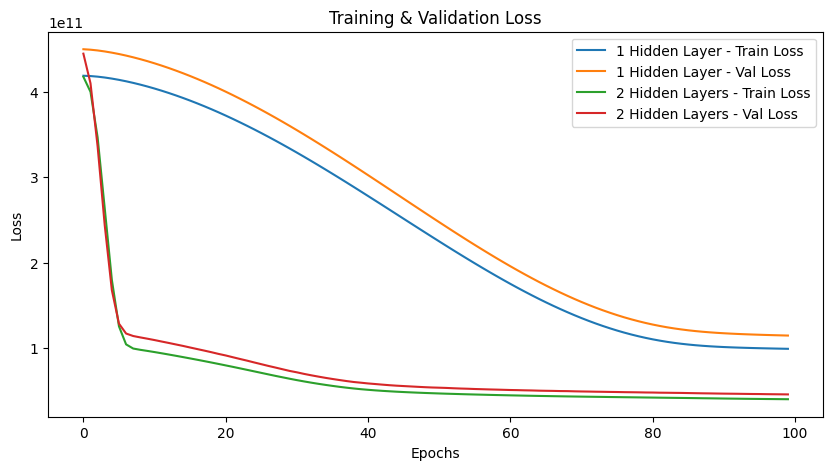

In [ ]:
# Train the models
history_1 = mlp_1_hidden.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=100, batch_size=32, verbose=1)
history_2 = mlp_2_hidden.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=100, batch_size=32, verbose=1)

# Plot training and validation loss curves
plt.figure(figsize=(10, 5))
plt.plot(history_1.history["loss"], label="1 Hidden Layer - Train Loss")
plt.plot(history_1.history["val_loss"], label="1 Hidden Layer - Val Loss")
plt.plot(history_2.history["loss"], label="2 Hidden Layers - Train Loss")
plt.plot(history_2.history["val_loss"], label="2 Hidden Layers - Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training & Validation Loss")
plt.legend()
plt.show()


From the provided **Training & Validation Loss** plot, we can compare the two models (1 Hidden Layer vs. 2 Hidden Layers) based on the following aspects:  

**1. Final Accuracy (Convergence Behavior)**  
- The **2 Hidden Layers model** (green and red curves) has a **lower final loss** compared to the **1 Hidden Layer model** (blue and orange curves).  
- This indicates that the **2 Hidden Layers model** has better learning capacity and generalization, likely leading to higher accuracy.

**2. Optimal Epochs (Early Stopping Point)**  
- The **2 Hidden Layers model** reaches a stable validation loss **faster** than the **1 Hidden Layer model**.  
- Around **20-30 epochs**, the **validation loss** of the 2-layer model is already close to its minimum, whereas the **1-layer model continues to decrease gradually** until later epochs (~80+).
- This suggests that the **2 Hidden Layers model converges faster** and could require **fewer training epochs** to reach optimal performance.



#### <font face="Verdana" color="green" size="+2">**3.7 Results Analysis (22 points)**




- Compare the two models in terms of **final accuracy and optimal epochs**.
- Predict house prices for **5 randomly selected validation samples** and analyze the results.

In [ ]:
import numpy as np

# Evaluate final loss
final_loss_1 = mlp_1_hidden.evaluate(X_val_scaled, y_val)
final_loss_2 = mlp_2_hidden.evaluate(X_val_scaled, y_val)

print(f"Final Validation Loss (1 Hidden Layer): {final_loss_1:.4f}")
print(f"Final Validation Loss (2 Hidden Layers): {final_loss_2:.4f}")

# Predict house prices for 5 random samples
random_indices = np.random.choice(len(X_val_scaled), 5, replace=False)
sample_X = X_val_scaled[random_indices]
sample_y = y_val.iloc[random_indices]

preds_1 = mlp_1_hidden.predict(sample_X).flatten()
preds_2 = mlp_2_hidden.predict(sample_X).flatten()

# Display results
for i in range(5):
    print(f"Sample {i+1}: Actual Price = {sample_y.iloc[i]}, Prediction (1 Hidden Layer) = {preds_1[i]:.2f}, Prediction (2 Hidden Layers) = {preds_2[i]:.2f}")


169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 111836692480.0000
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 46602948608.0000
Final Validation Loss (1 Hidden Layer): 114822275072.0000
Final Validation Loss (2 Hidden Layers): 46003986432.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step
Sample 1: Actual Price = 312500.0, Prediction (1 Hidden Layer) = 379653.34, Prediction (2 Hidden Layers) = 326488.78
Sample 2: Actual Price = 540000.0, Prediction (1 Hidden Layer) = 534090.06, Prediction (2 Hidden Layers) = 577005.31
Sample 3: Actual Price = 443500.0, Prediction (1 Hidden Layer) = 598748.50, Prediction (2 Hidden Layers) = 586059.94
Sample 4: Actual Price = 263300.0, Prediction (1 Hidden Layer) = 471484.34, Prediction (2 Hidden Layers) = 214544.78
Sample 5: Actual Price = 436000.0, Prediction (1 Hidden Layer) = 597204.62, Prediction (2 Hidden Layers) = 597708.31
